<a href="https://colab.research.google.com/github/torotoro21/GLAUCOMA-DETECTION/blob/ANGGA/hyperparameter_efficientnetv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GLAUCOMA DETECTION USING EFFICIENTNETV1

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Library

In [ ]:
import numpy as np
from imutils import paths
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from PIL import Image

from tensorflow.keras.regularizers import l2
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Directory

In [ ]:
import zipfile

img_paths = '/content/drive/MyDrive/TA/GLAUCOMA/Glaukoma.zip'
zip_ref = zipfile.ZipFile(img_paths, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
dataset_path = os.path.join('/content/Glaukoma')
imagePaths = paths.list_images(dataset_path)

data = []
labels = []

In [ ]:
for imagepath in imagePaths:
  image = Image.open(imagepath).convert('RGB')
  image = np.array(image.resize((224, 224))) / 255.0
  data.append(image)

  label = imagepath.split(os.path.sep)[-2]
  labels.append(label)


labels_train_unique = np.unique(np.array(labels))

In [ ]:
mata = {}

for i in range(len(labels_train_unique)):
  mata[labels_train_unique[i]] = i
mata

{'glaucoma': 0, 'normal': 1}

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [ ]:
(X_train, X_test, Y_train, Y_test) = train_test_split(np.array(data), np.array(labels), test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(944, 224, 224, 3)
(237, 224, 224, 3)
(944, 1)
(237, 1)


# Importing efficientnet

In [ ]:
!pip install -U --pre efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.0 MB/s 


In [ ]:
from efficientnet.tfkeras import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4

# PARAMETER BATCH SIZE

16804768/16804768 [==============================] - 2s 0us/step
batch size  16
Epoch 1/50
59/59 [==============================] - 30s 186ms/step - loss: 0.5588 - accuracy: 0.7150 - val_loss: 0.7697 - val_accuracy: 0.3629
Epoch 2/50
59/59 [==============================] - 9s 161ms/step - loss: 0.3325 - accuracy: 0.8591 - val_loss: 0.6961 - val_accuracy: 0.5823
Epoch 3/50
59/59 [==============================] - 9s 161ms/step - loss: 0.2126 - accuracy: 0.9258 - val_loss: 0.7828 - val_accuracy: 0.3671
Epoch 4/50
59/59 [==============================] - 10s 163ms/step - loss: 0.1262 - accuracy: 0.9619 - val_loss: 0.9587 - val_accuracy: 0.3460
Epoch 5/50
59/59 [==============================] - 10s 162ms/step - loss: 0.0830 - accuracy: 0.9746 - val_loss: 1.0309 - val_accuracy: 0.3460
Epoch 6/50
59/59 [==============================] - 10s 165ms/step - loss: 0.0629 - accuracy: 0.9809 - val_loss: 1.0529 - val_accuracy: 0.3882
Epoch 7/50
59/59 [==============================] - 10s 163ms/st

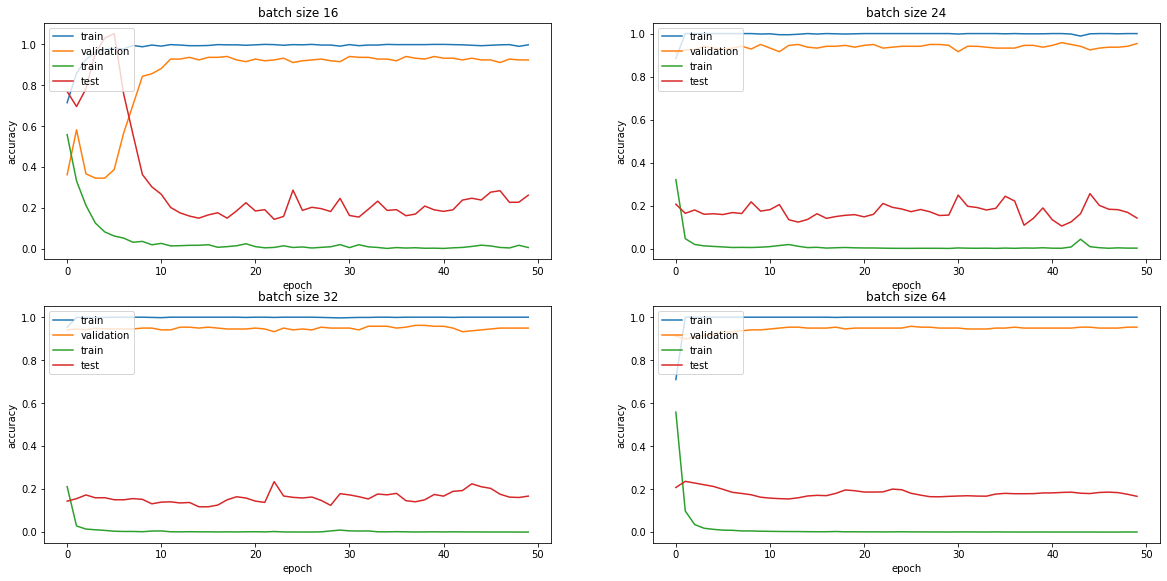

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam, SGD

base_model = EfficientNetB0(
    weights='imagenet',
    input_shape=(224,224,3),
    include_top=False,
    #classes=2
)

batch_sizes = [16, 24, 32, 64]

plt.figure(figsize=(20, 20))
for i in range(len(batch_sizes)):
  plot_no=420 + (i+1)
  plt.subplot(plot_no)

  model=tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  optimizers=Adam(learning_rate=0.0001)
  model.compile(optimizer = optimizers,
              loss='binary_crossentropy',
              metrics = ['accuracy'])
  btc = batch_sizes[i]
  print("batch size ", btc)

  history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=batch_sizes[i])
  

  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='validation')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.title("batch size "+str(btc))
  plt.legend(loc='upper left')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')

  

plt.show()

# PARAMETER EPOCH

Epoch  40
Epoch 1/40
30/30 [==============================] - 22s 352ms/step - loss: 0.6074 - accuracy: 0.6631 - val_loss: 0.6824 - val_accuracy: 0.6203
Epoch 2/40
30/30 [==============================] - 9s 309ms/step - loss: 0.4084 - accuracy: 0.8178 - val_loss: 0.6782 - val_accuracy: 0.6540
Epoch 3/40
30/30 [==============================] - 9s 312ms/step - loss: 0.2938 - accuracy: 0.8898 - val_loss: 0.6736 - val_accuracy: 0.6582
Epoch 4/40
30/30 [==============================] - 9s 310ms/step - loss: 0.2011 - accuracy: 0.9343 - val_loss: 0.6655 - val_accuracy: 0.6540
Epoch 5/40
30/30 [==============================] - 9s 308ms/step - loss: 0.1218 - accuracy: 0.9735 - val_loss: 0.6888 - val_accuracy: 0.5738
Epoch 6/40
30/30 [==============================] - 9s 302ms/step - loss: 0.0796 - accuracy: 0.9852 - val_loss: 0.7469 - val_accuracy: 0.4177
Epoch 7/40
30/30 [==============================] - 9s 304ms/step - loss: 0.0516 - accuracy: 0.9915 - val_loss: 0.8187 - val_accuracy: 0.

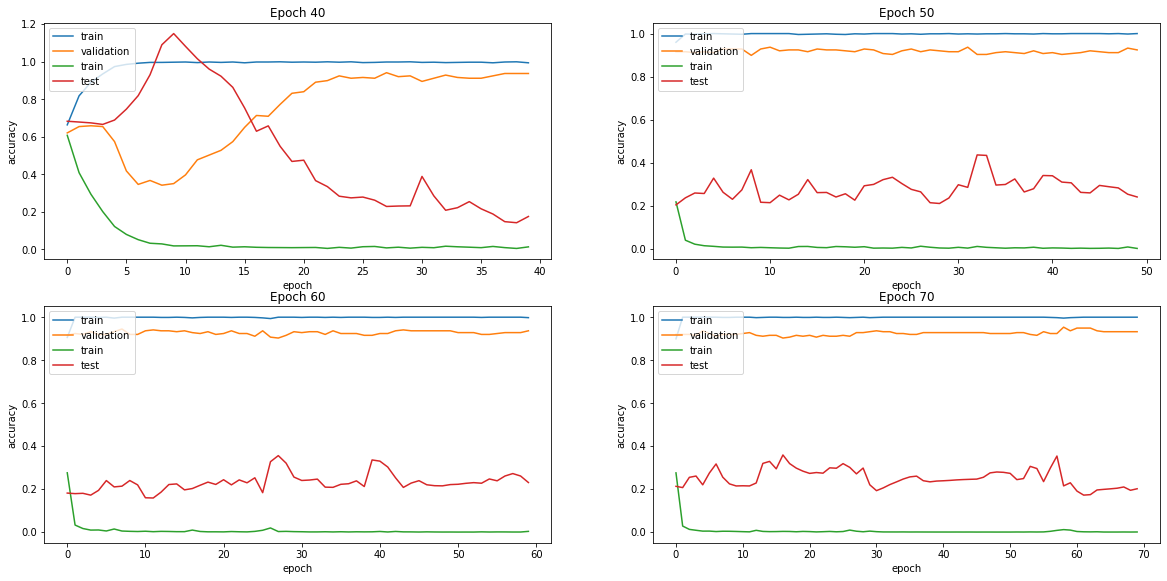

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam, SGD

base_model = EfficientNetB0(
    weights='imagenet',
    input_shape=(224,224,3),
    include_top=False,
    #classes=2
)

#batch_sizes = [16, 24, 32, 64]
epo = [40, 50, 60, 70]


plt.figure(figsize=(20, 20))
for i in range(len(epo)):
  plot_no=420 + (i+1)
  plt.subplot(plot_no)

  model=tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  optimizers=Adam(learning_rate=0.0001)
  model.compile(optimizer = optimizers,
              loss='binary_crossentropy',
              metrics = ['accuracy'])
  
  epp = epo[i]
  print("Epoch ", epp)
  

  history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epo[i], batch_size=32)

  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='validation')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.title("Epoch "+str(epp))
  plt.legend(loc='upper left')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  

plt.show()

# PARAMETER LEARNING RATE

Learning Rate  0.01
Epoch 1/50
30/30 [==============================] - 22s 369ms/step - loss: 0.9358 - accuracy: 0.6070 - val_loss: 306065.0000 - val_accuracy: 0.6582
Epoch 2/50
30/30 [==============================] - 9s 309ms/step - loss: 0.8191 - accuracy: 0.6155 - val_loss: 112.1955 - val_accuracy: 0.6456
Epoch 3/50
30/30 [==============================] - 9s 310ms/step - loss: 0.7503 - accuracy: 0.5858 - val_loss: 641.1060 - val_accuracy: 0.3418
Epoch 4/50
30/30 [==============================] - 9s 306ms/step - loss: 0.7046 - accuracy: 0.5975 - val_loss: 1.5642 - val_accuracy: 0.6582
Epoch 5/50
30/30 [==============================] - 9s 305ms/step - loss: 0.7251 - accuracy: 0.5953 - val_loss: 5.5602 - val_accuracy: 0.6582
Epoch 6/50
30/30 [==============================] - 9s 302ms/step - loss: 0.7519 - accuracy: 0.5847 - val_loss: 9.2579 - val_accuracy: 0.3671
Epoch 7/50
30/30 [==============================] - 9s 302ms/step - loss: 0.6959 - accuracy: 0.6059 - val_loss: 1.5308

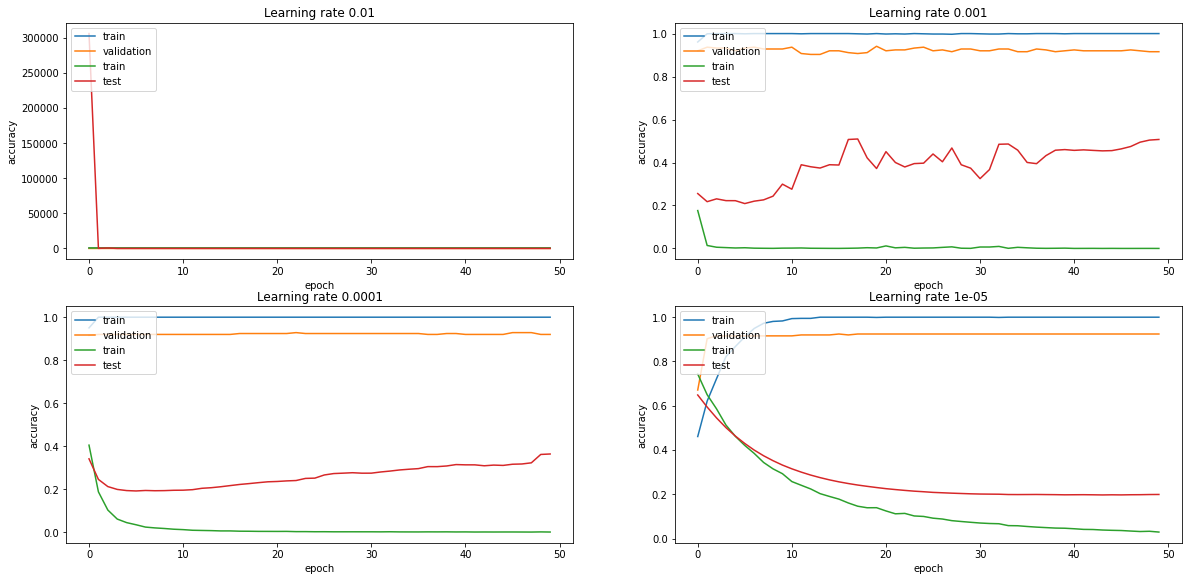

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam, SGD

#batch_sizes = [16, 24, 32, 64]
#epo = [40, 50, 60, 70]
lr = [0.01, 0.001, 0.0001, 0.00001]

base_model = EfficientNetB0(
    weights='imagenet',
    input_shape=(224,224,3),
    include_top=False,
    #classes=2
)

plt.figure(figsize=(20, 20))
for i in range(len(lr)):
  plot_no=420 + (i+1)
  plt.subplot(plot_no)

  model=tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  optimizers=Adam(learning_rate=lr[i])
  model.compile(optimizer = optimizers,
              loss='binary_crossentropy',
              metrics = ['accuracy'])
  
  lrr = lr[i]
  print("Learning Rate ",lrr)

  history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=32)

  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='validation')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.title("Learning rate "+ str(lrr))
  plt.legend(loc='upper left')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  

plt.show()

16804768/16804768 [==============================] - 0s 0us/step
Learning Rate  <class 'keras.optimizers.optimizer_v2.adam.Adam'>
Epoch 1/50
30/30 [==============================] - 28s 396ms/step - loss: 0.4322 - accuracy: 0.7871 - val_loss: 1.0119 - val_accuracy: 0.3544
Epoch 2/50
30/30 [==============================] - 9s 303ms/step - loss: 0.1816 - accuracy: 0.9311 - val_loss: 0.8991 - val_accuracy: 0.4515
Epoch 3/50
30/30 [==============================] - 9s 311ms/step - loss: 0.0883 - accuracy: 0.9672 - val_loss: 1.1673 - val_accuracy: 0.3924
Epoch 4/50
30/30 [==============================] - 9s 310ms/step - loss: 0.0422 - accuracy: 0.9831 - val_loss: 1.2035 - val_accuracy: 0.3376
Epoch 5/50
30/30 [==============================] - 9s 310ms/step - loss: 0.0687 - accuracy: 0.9735 - val_loss: 2.2810 - val_accuracy: 0.3376
Epoch 6/50
30/30 [==============================] - 9s 304ms/step - loss: 0.0830 - accuracy: 0.9693 - val_loss: 2.3370 - val_accuracy: 0.3333
Epoch 7/50
30/30 

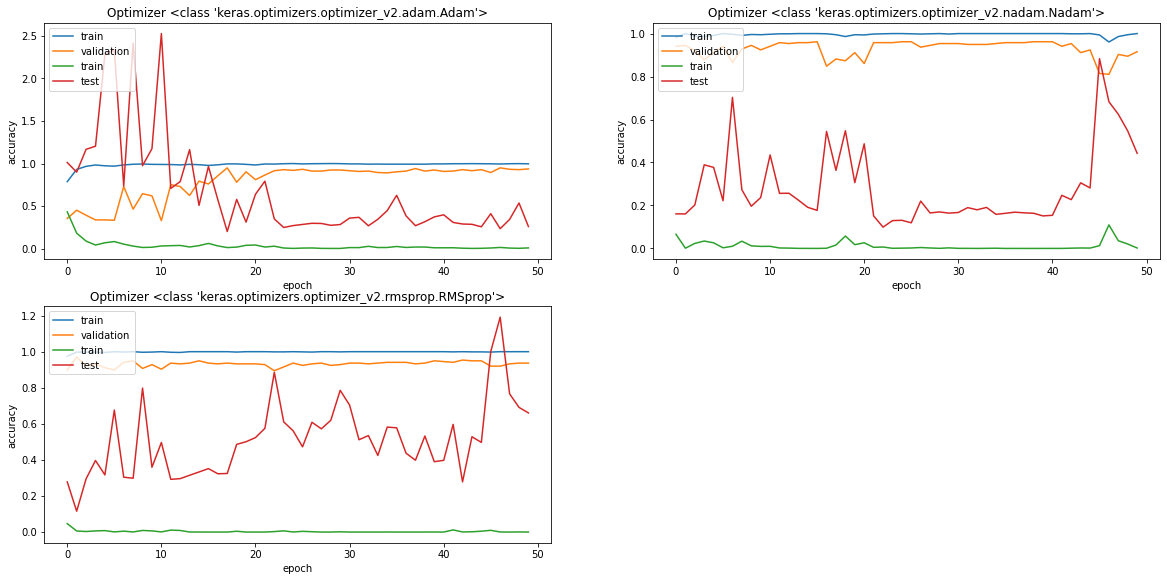

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam, SGD

#batch_sizes = [16, 24, 32, 64]
#epo = [40, 50, 60, 70]
#lr = [0.01, 0.001, 0.0001, 0.00001]
opt = [Adam, Nadam, RMSprop]
base_model = EfficientNetB0(
    weights='imagenet',
    input_shape=(224,224,3),
    include_top=False,
    #classes=2
)

plt.figure(figsize=(20, 20))

for i in range(len(opt)):
  plot_no=420 + (i+1)
  plt.subplot(plot_no)

  model=tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  #optimizers=Adam(learning_rate=0.001)
  model.compile(optimizer = opt[i](learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
  
  optt = opt[i]
  print("Learning Rate ",optt)

  history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=32)

  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='validation')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.title("Optimizer "+ str(optt))
  plt.legend(loc='upper left')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  

plt.show()